In [2]:
import cv2
import matplotlib.pyplot as plt
candyBGR = cv2.imread('../data/candies.png')
candyRGB = cv2.cvtColor(candyBGR, cv2.COLOR_BGR2RGB)
doNotCopy = cv2.imread('../data/watermark_no_copy.png')
doNotCopy = cv2.cvtColor(doNotCopy, cv2.COLOR_BGR2RGB)
candyRGB.shape, doNotCopy.shape

((286, 380, 3), (734, 734, 3))

In [5]:
doNotCopy = cv2.resize(doNotCopy, (100,100))
doNotCopy.shape

(100, 100, 3)

In [6]:
x_offset = candyRGB.shape[1] - doNotCopy.shape[1]
y_offset = candyRGB.shape[0] - doNotCopy.shape[0]
x_offset, y_offset


(280, 186)

In [9]:
roi = candyRGB[y_offset:candyRGB.shape[0], x_offset:candyRGB.shape[1]]

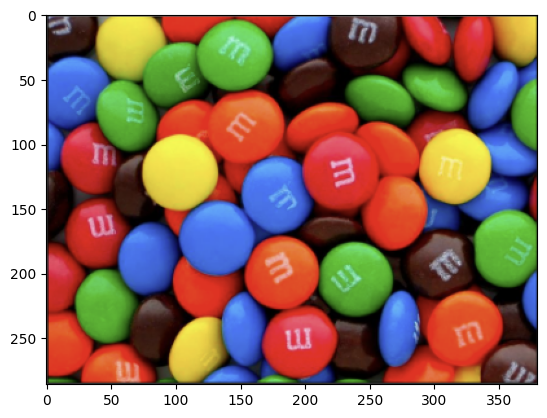

In [10]:
plt.imshow(candyRGB);

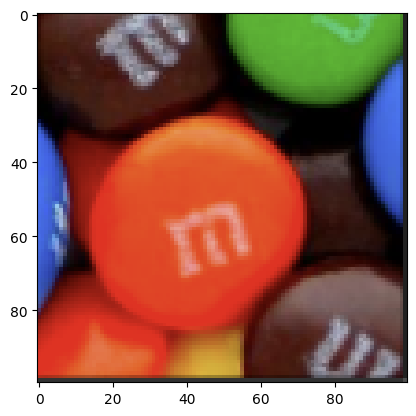

In [11]:
plt.imshow(roi);

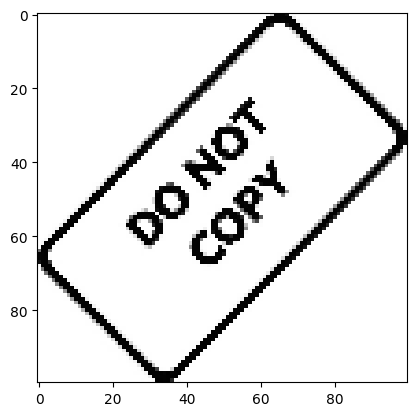

In [12]:
doNotCopy_Gray = cv2.cvtColor(doNotCopy, cv2.COLOR_RGB2GRAY)
plt.imshow(doNotCopy_Gray, cmap='gray');

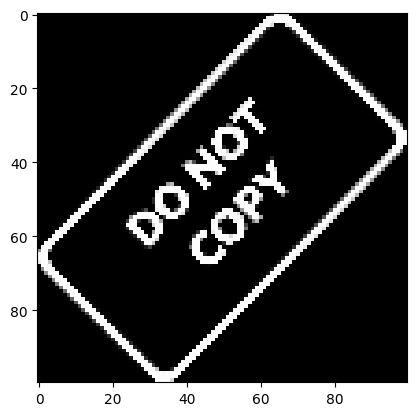

In [13]:
mask_inv = cv2.bitwise_not(doNotCopy_Gray)
plt.imshow(mask_inv, cmap='gray');

In [14]:
mask_inv.shape

(100, 100)

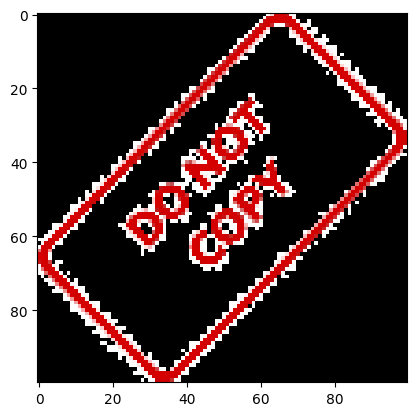

In [18]:
fg = cv2.bitwise_or(doNotCopy, doNotCopy, mask=mask_inv)
plt.imshow(fg);

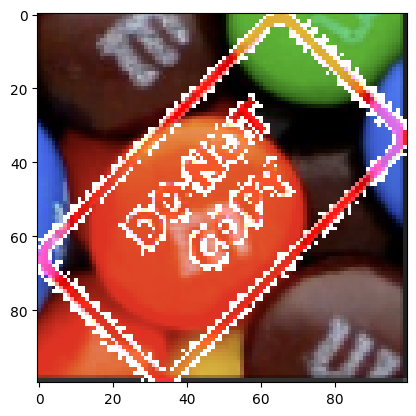

In [19]:
markedROI = cv2.bitwise_or(roi, fg)
plt.imshow(markedROI);

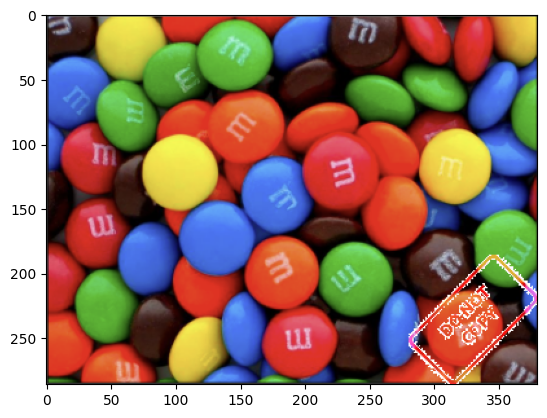

In [21]:
candyRGB[y_offset:y_offset+doNotCopy.shape[0], x_offset:x_offset+doNotCopy.shape[1]] = markedROI
plt.imshow(candyRGB);